In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
# import data into environement
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.iloc[:, :11].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3


In [25]:
# What is the output variable?
# - Price

# What are the input variable you think are relevant / drive the output?
# - sqft, grade, renovation year, exclude lat/long?
# - actually location could be relevant
# - zipcode vs lat/lon
# - bed / bath
# - view & waterfront
# - data sold
# - correlation coefficients

# What hypotheses do you have?
# - sft
# - location
# - year renovated
# - condition of house
# - view matters depending on type of house.

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [28]:
df.iloc[:, :11].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000


In [29]:
df.iloc[:, 11:].describe()


,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [31]:
df.iloc[:, 2:].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<Axes: >

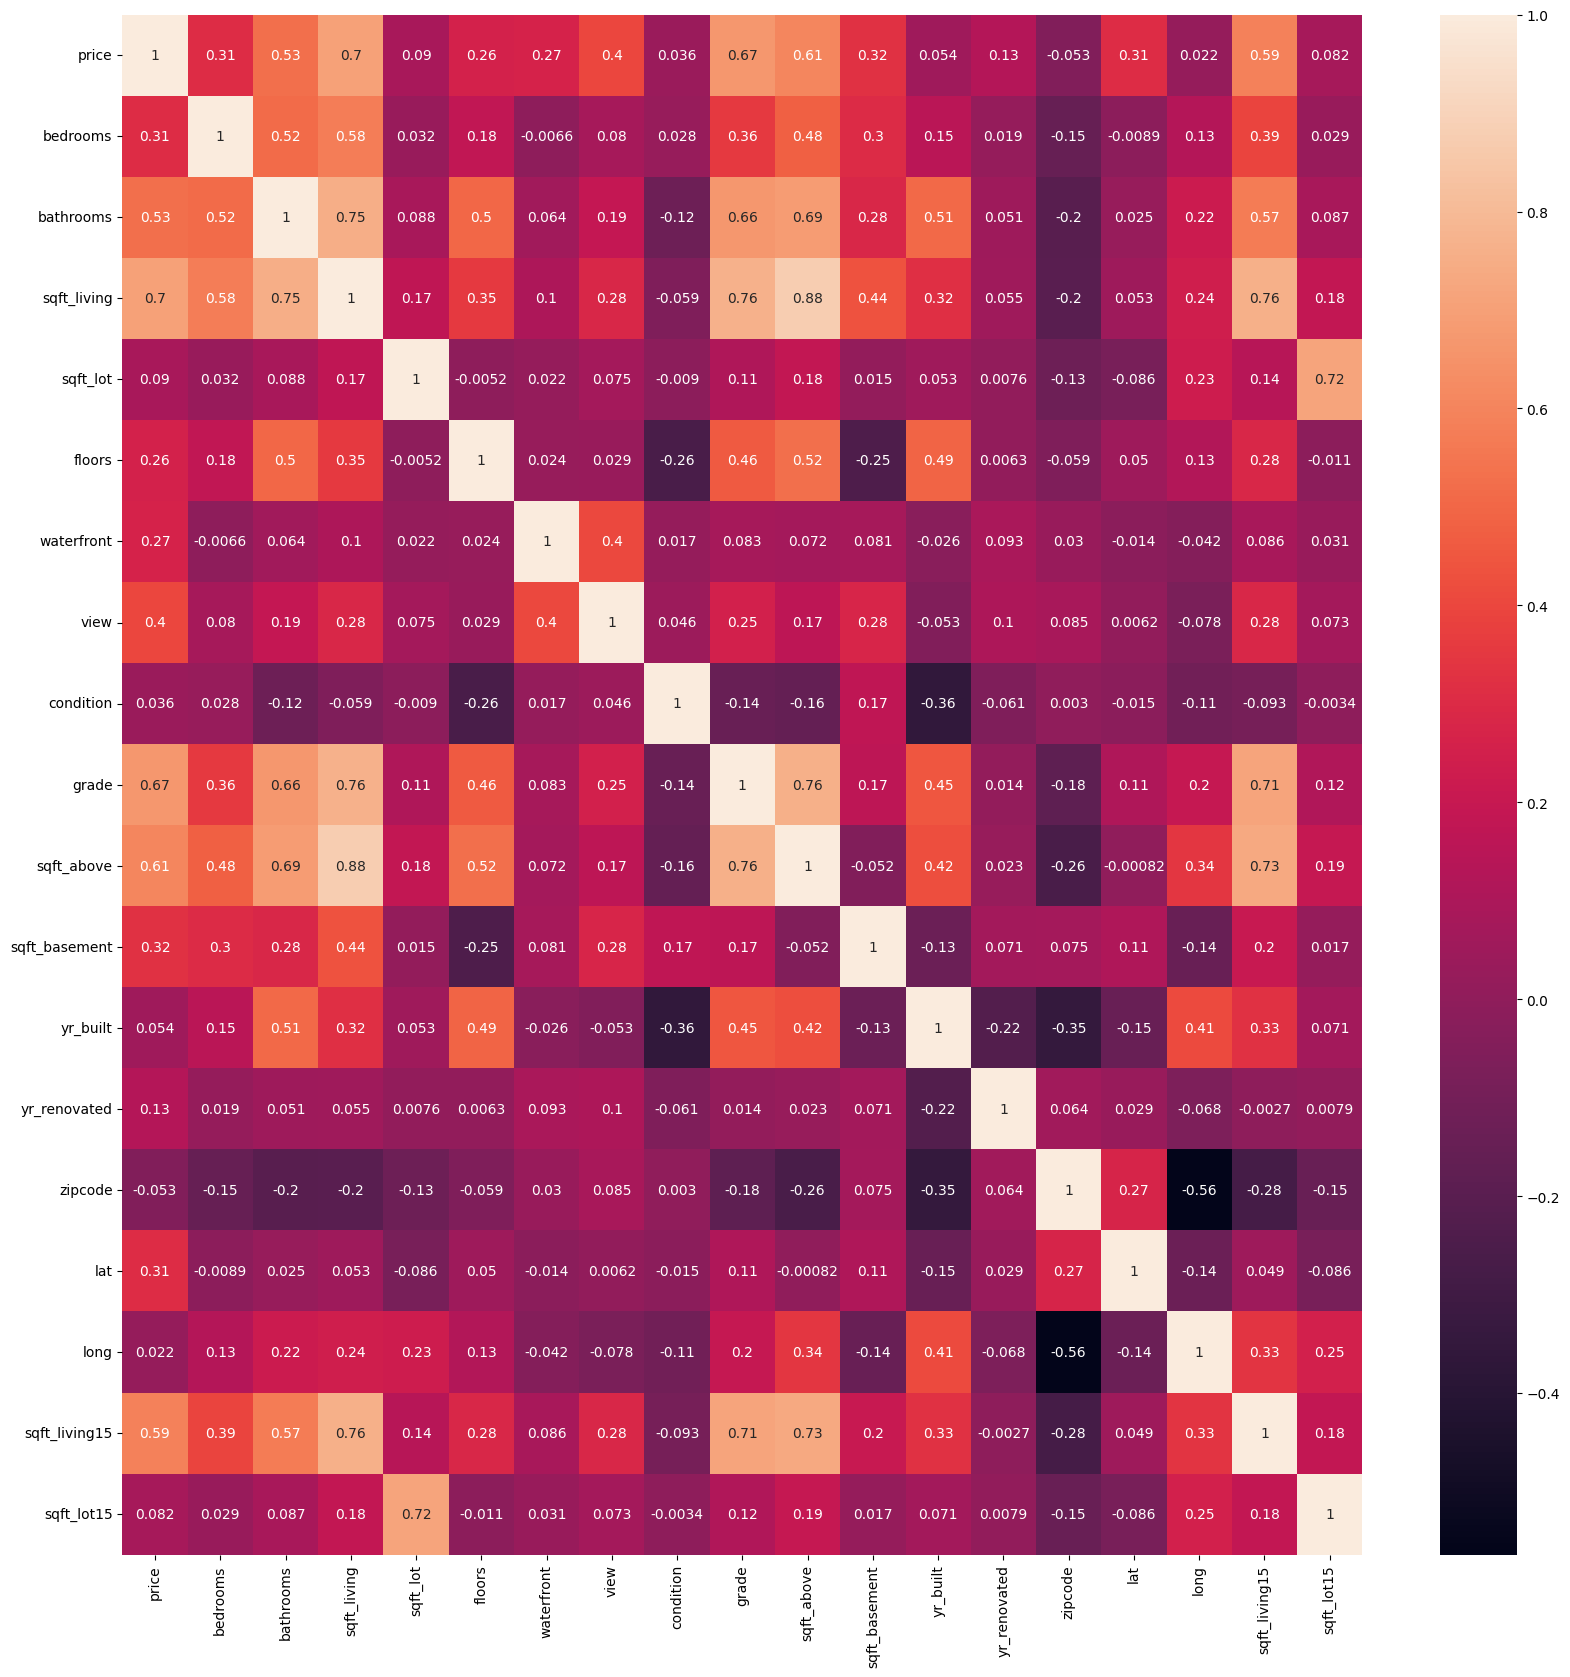

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True)
    

In [39]:
df['date'] = pd.to_datetime(df['date'])
df.head()




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,data
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18


<Axes: ylabel='bathrooms'>

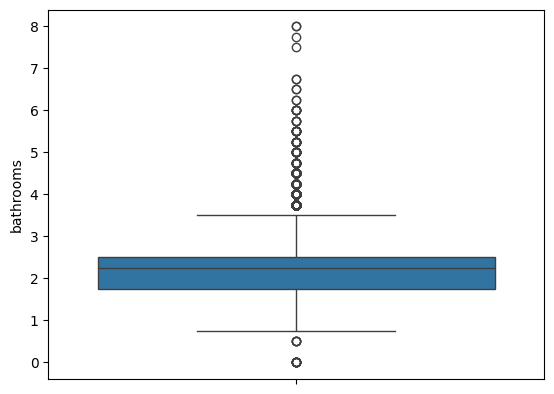

In [41]:
sns.boxplot(df['bathrooms'])

In [46]:
luxury_homes = df[df['bathrooms'] > 3.75]

In [47]:
luxury_homes.index

Index([    5,    75,   235,   270,   300,   419,   450,   471,   527,   571,
       ...
       21485, 21486, 21494, 21501, 21506, 21520, 21532, 21551, 21561, 21576],
      dtype='int64', length=402)

In [50]:
df_no_luxury = df.drop(luxury_homes.index)

In [57]:
df_no_luxury[df_no_luxury['bedrooms'] > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,data
209,6300000550,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0,0,...,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312,2014-07-17
232,9264902050,2014-11-21,315000.0,6,2.75,2940,7350,1.0,0,0,...,1780,1160,1978,0,98023,47.3103,-122.339,2120,8236,2014-11-21
239,5152100060,2014-05-29,472000.0,6,2.50,4410,14034,1.0,0,2,...,2350,2060,1965,0,98003,47.3376,-122.324,2600,13988,2014-05-29
331,2946001550,2015-04-16,279000.0,6,1.75,2240,11180,2.0,0,0,...,2240,0,1955,0,98198,47.4200,-122.323,1590,7955,2015-04-16
486,9286000240,2014-07-11,1067000.0,6,3.50,4860,11793,2.0,0,0,...,3860,1000,1998,0,98006,47.5521,-122.137,3600,11793,2014-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,3232200085,2015-04-28,1500000.0,6,3.50,3670,3959,2.0,0,0,...,2410,1260,2008,0,98119,47.6356,-122.373,2060,3625,2015-04-28
20873,8946390040,2014-05-08,375000.0,6,2.25,3206,5793,2.0,0,0,...,3206,0,2012,0,98032,47.3690,-122.287,2527,5804,2014-05-08
21085,4449800480,2015-03-18,677790.0,6,3.00,2800,4213,2.0,0,0,...,2800,0,1998,0,98117,47.6892,-122.389,1440,3960,2015-03-18
21375,6061500100,2014-07-17,1174660.0,6,3.50,4310,7760,2.0,0,0,...,3260,1050,2013,0,98059,47.5297,-122.155,4620,10217,2014-07-17


In [58]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [60]:
from scipy import stats


In [64]:
# example of winsorization
df_no_luxury['bedrooms_winsorized'] = stats.mstats.winsorize(df_no_luxury['bedrooms'], limits=[0.01,0.99])


In [65]:
df_no_luxury[['bedrooms','bedrooms_winsorized']]

,bedrooms,bedrooms_winsorized
0,3,2
1,3,2
2,2,2
3,4,2
4,3,2
...,...,...
21608,3,2
21609,4,2
21610,2,2
21611,3,2


In [66]:
df_no_luxury['sqft_living_winsorized'] = stats.mstats.winsorize(df_no_luxury['sqft_living'], limits=[0.00,0.99])


In [71]:
df_no_luxury[df_no_luxury['change'] != 0][['sqft_living','sqft_living_winsorized']]

,sqft_living,sqft_living_winsorized
0,1180,720
1,2570,720
2,770,720
3,1960,720
4,1680,720
...,...,...
21608,1530,720
21609,2310,720
21610,1020,720
21611,1600,720


In [72]:
df_no_luxury.drop('id', axis=1, inplace=True)

In [73]:
df_no_luxury


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,data,bedrooms_winsorized,sqft_living_winsorized,change
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014-10-13,2,720,-460
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,2,720,-1850
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2,720,-50
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014-12-09,2,720,-1240
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2,720,-960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,2014-05-21,2,720,-810
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,2015-02-23,2,720,-1590
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,98144,47.5944,-122.299,1020,2007,2014-06-23,2,720,-300
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,98027,47.5345,-122.069,1410,1287,2015-01-16,2,720,-880


In [74]:
# extracting values from dates
df_no_luxury['sale_month'] = df_no_luxury['date'].apply(lambda x: x.month)

In [75]:
df_no_luxury



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,data,bedrooms_winsorized,sqft_living_winsorized,change,sale_month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014-10-13,2,720,-460,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,2014-12-09,2,720,-1850,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2015-02-25,2,720,-50,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014-12-09,2,720,-1240,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2015-02-18,2,720,-960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,2014-05-21,2,720,-810,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,2015-02-23,2,720,-1590,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,2014-06-23,2,720,-300,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,2015-01-16,2,720,-880,1


<Axes: >

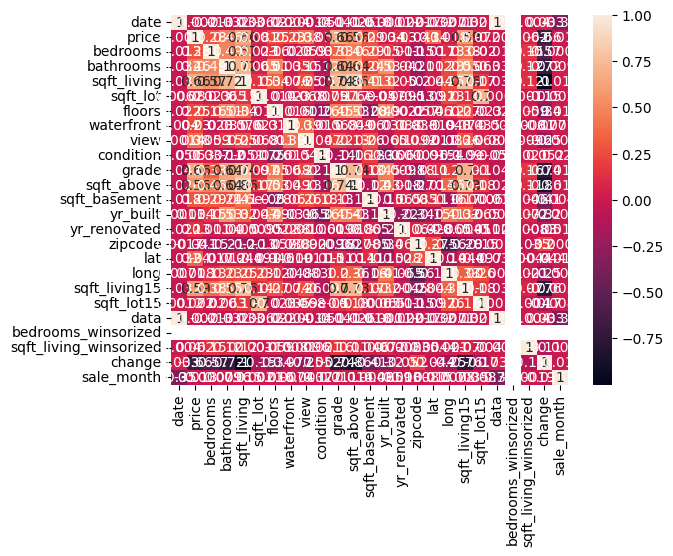

In [76]:
sns.heatmap(df_no_luxury.corr(), annot=True)

<Axes: xlabel='grade', ylabel='price'>

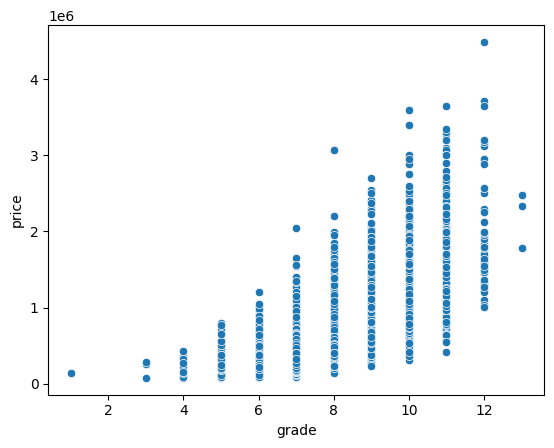

In [78]:
sns.scatterplot(x=df_no_luxury['grade'], y=df_no_luxury['price'])

<Axes: xlabel='grade', ylabel='price'>

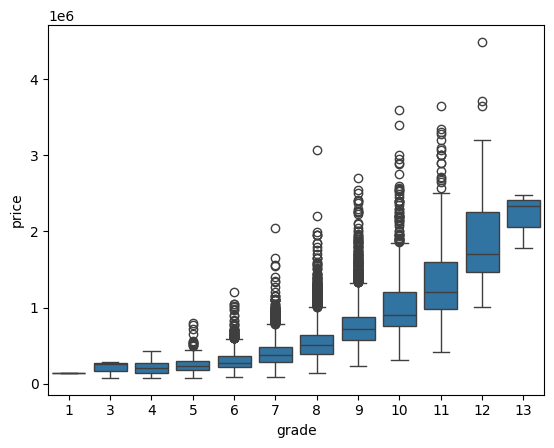

In [79]:
sns.boxplot(x=df_no_luxury['grade'], y=df_no_luxury['price'])

<Axes: xlabel='view', ylabel='price'>

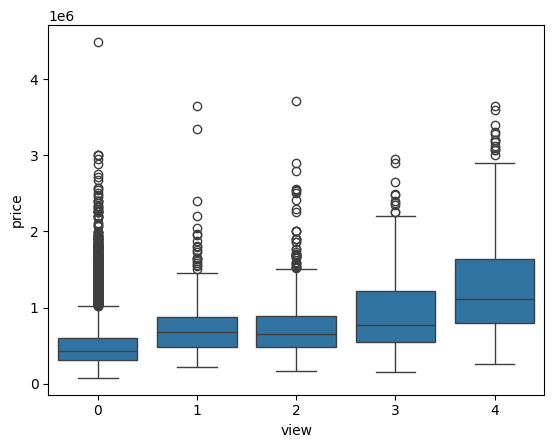

In [80]:
sns.boxplot(x=df_no_luxury['view'], y=df_no_luxury['price'])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Bedrooms, Sqft, Bathrooms, grade, Location,
#Size, Luxury



<Axes: xlabel='bedrooms', ylabel='price'>

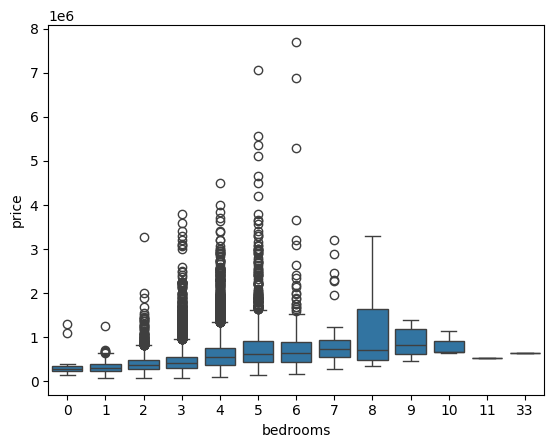

In [8]:
sns.boxplot(x="bedrooms", y="price", data=df)

<Axes: xlabel='grade', ylabel='price'>

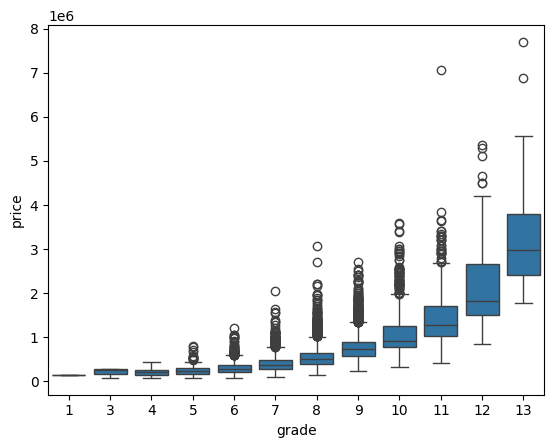

In [9]:
sns.boxplot(x="grade", y="price", data=df)

<Axes: xlabel='sqft_living', ylabel='sqft_lot'>

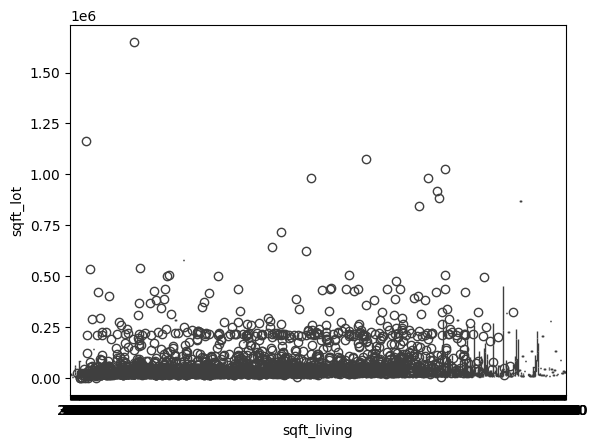

In [11]:
sns.boxplot(x="sqft_living", y="sqft_lot", data=df)

In [12]:
df['price_per_sqft'] = df['price']/ df['sqft_living']

<Axes: ylabel='price_per_sqft'>

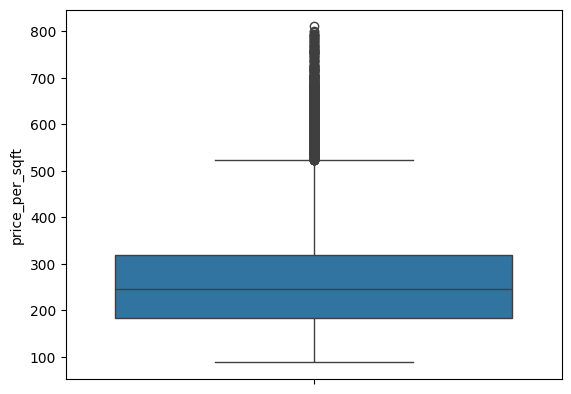

In [13]:
sns.boxplot(y='price_per_sqft', data=df)

In [16]:
df.groupby('zipcode')['price_per_sqft'].mean()

zipcode
98001    151.387938
98002    151.174091
98003    157.113414
98004    475.435611
98005    314.929231
            ...    
98177    292.918745
98178    189.172528
98188    169.007306
98198    178.428610
98199    376.546345
Name: price_per_sqft, Length: 70, dtype: float64

In [17]:
price_per_sqft = df.groupby('zipcode')['price_per_sqft'].mean().to_dict()

<Axes: xlabel='zipcode', ylabel='price_per_sqft'>

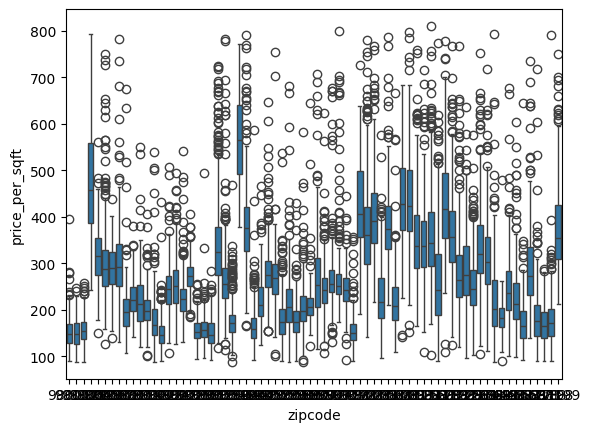

In [18]:
sns.boxplot(x='zipcode',y='price_per_sqft',data=df)

In [29]:
df.groupby('zipcode')['price'].sum().to_frame()

,price
zipcode,
98001,101651298.0
98002,46622523.0
98003,82351158.0
98004,429828885.0
98005,136107699.0
...,...
98177,172427275.0
98178,81380542.0
98188,39314655.0


<Axes: xlabel='zipcode', ylabel='price_per_sqft'>

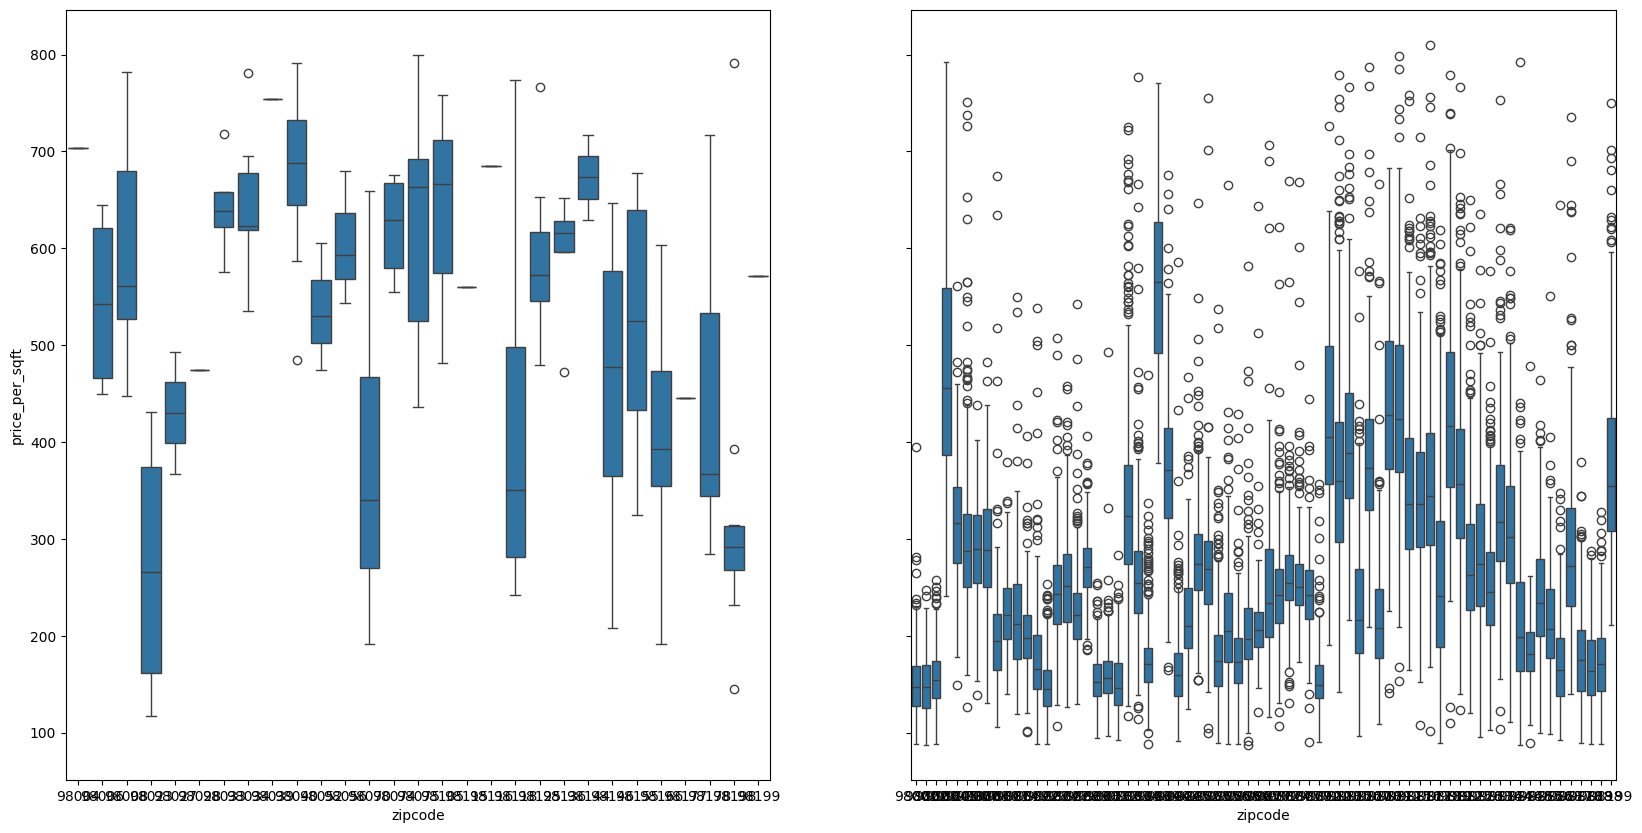

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10), sharey=True)
sns.boxplot(x='zipcode',y='price_per_sqft',data=df[df['waterfront']==1], ax=ax1)
sns.boxplot(x='zipcode',y='price_per_sqft',data=df[df['waterfront']==0], ax=ax2)

In [31]:
price_per_sqft

{98001: 151.38793756502668,
 98002: 151.17409095919788,
 98003: 157.11341446884097,
 98004: 475.4356109509919,
 98005: 314.92923109821106,
 98006: 299.0914758506965,
 98007: 290.04901987794375,
 98008: 301.7177311724625,
 98010: 210.0953556830966,
 98011: 225.9872354469397,
 98014: 223.08451167083297,
 98019: 203.0017247765589,
 98022: 181.80643984402292,
 98023: 148.91982870319703,
 98024: 255.23362000685177,
 98027: 251.57228867661547,
 98028: 225.14308528697757,
 98029: 272.07088728906865,
 98030: 155.156220666326,
 98031: 161.04039300615375,
 98032: 154.21951345168029,
 98033: 343.16245412587455,
 98034: 265.95224836863713,
 98038: 173.65623467380615,
 98039: 568.0833501011733,
 98040: 387.29252438969064,
 98042: 164.3484517974173,
 98045: 220.46452757577,
 98052: 280.38632376692135,
 98053: 269.4718271601291,
 98055: 180.40249146722007,
 98056: 215.53612655026214,
 98058: 178.20436170206634,
 98059: 207.24234574313533,
 98065: 210.88604670458065,
 98070: 281.3433626414773,
 98072:

In [24]:
df.sort_values('zipcode')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
11553,4031700030,20150410T000000,299999.0,3,2.50,2380,9719,2.0,0,0,...,2380,0,2001,0,98001,47.2932,-122.283,2830,11505,126.050000
18935,3353404265,20141231T000000,460000.0,3,2.50,2720,40813,2.0,0,0,...,2720,0,2001,0,98001,47.2619,-122.271,2250,40511,169.117647
16355,2214800170,20150415T000000,295000.0,3,2.50,1940,10350,1.0,0,0,...,1420,520,1979,0,98001,47.3385,-122.256,1810,7800,152.061856
6819,304100010,20141209T000000,269500.0,4,2.25,1700,7056,2.0,0,0,...,1700,0,1999,0,98001,47.3385,-122.262,1650,6025,158.529412
18933,7696620100,20150422T000000,254999.0,3,1.00,1580,7560,1.0,0,0,...,1000,580,1976,0,98001,47.3318,-122.277,1580,7560,161.391772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,871000435,20150509T000000,812000.0,4,2.00,2380,6122,1.0,0,2,...,1310,1070,1949,0,98199,47.6506,-122.405,1810,5202,341.176471
10909,1370803925,20140903T000000,535000.0,2,2.00,1510,5133,1.5,0,0,...,1510,0,1939,0,98199,47.6415,-122.401,1470,6000,354.304636
15505,6823100225,20150414T000000,700000.0,4,1.75,1870,6000,1.0,0,0,...,1670,200,1949,0,98199,47.6435,-122.399,1710,6000,374.331551
10969,3271300955,20140703T000000,554729.0,4,2.50,2020,4350,2.0,0,0,...,1730,290,1943,0,98199,47.6503,-122.410,1620,5800,274.618317


In [34]:
df['avg_price_per_sqft'] = df['zipcode'].map(price_per_sqft)

In [35]:
price_per_sqft_frame = df.groupby('zipcode')['price_per_sqft'].mean().to_frame()

In [36]:
new_df = pd.merge(df, price_per_sqft_frame, left_on = 'zipcode', right_on='zipcode')

In [37]:
new_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_x,avg_price_per_sqft,price_per_sqft_y
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,189.172528,189.172528
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,282.471664,282.471664
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,225.143085,225.143085
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,337.218034,337.218034
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,265.671342,265.671342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,369.841013,369.841013
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,225.491431,225.491431
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,312.241854,312.241854
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,251.572289,251.572289


In [41]:
df['above/below'] = df['price_per_sqft'] - df['avg_price_per_sqft']

In [42]:
df['avg_sqft_for_area'] = df['zipcode'].map(df.groupby('zipcode')['sqft_living'].mean().to_dict())

In [43]:
df['above/below_sqft'] = df['sqft_living'] - df['avg_sqft_for_area']

In [52]:
def sale_category(row):
    # condition 1: if the house sold for less per sqft than the average price for the zipcode, AND the house was bigger than the avg size for the zipcode, then we got a value purchase
    if row["above/below"] < 0 and row['above/below_sqft'] > 0:
    # condition 2: if the house sold for less per sqft than the avg price for the zipcode, OR the house was bigger than avg for the area, then not necessarily a deal, but good outcome
        return "value sale"
    elif row["above/below"] < 0 and row['above/below_sqft'] > 0:
        return "average sale"
    #  if neither was met, house is overpriced
    else:
        return "overpriced"

In [53]:
df['sale_value'] = df.apply(sale_category, axis=1)

In [55]:
df.groupby('sale_value').count()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,avg_price_per_sqft,above/below,avg_sqft_for_area,above/below_sqft
sale_value,,,,,,,,,,,,,,,,,,,,,
overpriced,14640,14640,14640,14640,14640,14640,14640,14640,14640,14640,...,14640,14640,14640,14640,14640,14640,14640,14640,14640,14640
value sale,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973,...,6973,6973,6973,6973,6973,6973,6973,6973,6973,6973


In [56]:
df2 = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/class2_sample_dataset.csv')

In [57]:
df2

,id,age,salary,city,experience,department
0,1,56.0,21864.850000,Nw York,33,Operations
1,2,69.0,29498.270000,Chicago,5,Finance
2,3,46.0,59544.580000,Chicago,19,Operations
3,4,32.0,NaN,San Francisco,4,IT
4,5,60.0,57140.640000,San Francisco,35,HR
...,...,...,...,...,...,...
95,96,42.0,50984.740000,Los Angeles,39,Finance
96,97,62.0,255192.192222,New York,5,Finance
97,98,58.0,63099.750000,San Francisco,22,Finance
98,99,46.0,53084.750000,Chicago,29,Finance


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          100 non-null    int64  
 1   age         90 non-null     float64
 2   salary      92 non-null     float64
 3   city        91 non-null     object 
 4   experience  100 non-null    int64  
 5   department  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [60]:
# Why is the data missing?
# MCAR = Data Missing COMPLETELY at Random, MAR = Data Missising AT Random, MNAR = Data Missing NOT at Random

In [62]:
df2[df2.city.isnull()]['salary'].mean()

47403.23714285714

In [63]:
df2.groupby('city')['salary'].mean()

city
Chicago          58053.367346
Los Angeles      75837.098963
New York         70744.525222
Nw York          52600.087778
San Francisco    56301.341304
Name: salary, dtype: float64

In [64]:
df2[df2.salary.isnull()]

,id,age,salary,city,experience,department
3,4,32.0,NaN,San Francisco,4,IT
6,7,38.0,NaN,NaN,28,HR
33,34,45.0,NaN,San Francisco,26,Finance
41,42,54.0,NaN,San Francisco,25,IT
42,43,68.0,NaN,NaN,24,Finance
50,51,NaN,NaN,Nw York,14,Operations
68,69,21.0,NaN,San Francisco,5,IT
81,82,48.0,NaN,Chicago,28,Operations


In [68]:
df2.isnull().sum()/100

id            0.00
age           0.10
salary        0.08
city          0.09
experience    0.00
department    0.00
dtype: float64

In [71]:
df2.isnull().sum().sum()/ df2.drop('id', axis=1).size

0.054

In [72]:
df2.size

600

In [76]:
df2.describe(include='all')


,id,age,salary,city,experience,department
count,100.000000,90.000000,92.000000,91,100.000000,100
unique,NaN,NaN,NaN,5,NaN,4
top,NaN,NaN,NaN,San Francisco,NaN,Finance
freq,NaN,NaN,NaN,27,NaN,29
mean,50.500000,44.111111,61930.020664,NaN,21.220000,NaN
std,29.011492,15.169043,49068.536745,NaN,11.350771,NaN
min,1.000000,19.000000,20901.330000,NaN,1.000000,NaN
25%,25.750000,32.000000,38496.567500,NaN,12.750000,NaN
50%,50.500000,42.500000,51621.040000,NaN,23.000000,NaN
75%,75.250000,57.750000,63346.867500,NaN,31.000000,NaN


In [77]:
df2.dropna().describe(include='all')

,id,age,salary,city,experience,department
count,76.000000,76.000000,76.000000,76,76.000000,76
unique,NaN,NaN,NaN,5,NaN,4
top,NaN,NaN,NaN,San Francisco,NaN,Operations
freq,NaN,NaN,NaN,21,NaN,23
mean,53.144737,44.723684,63919.643436,NaN,22.039474,NaN
std,28.928281,15.785731,53220.816385,NaN,11.278819,NaN
min,1.000000,19.000000,20901.330000,NaN,1.000000,NaN
25%,28.750000,31.750000,39036.797500,NaN,14.500000,NaN
50%,56.500000,44.000000,50703.115000,NaN,23.000000,NaN
75%,76.250000,59.250000,63517.910000,NaN,32.000000,NaN


In [78]:
# filling in with constant value
df2['city'] = df2['city'].fillna('Uknown')

In [80]:
df2.groupby('city').count()

,id,age,salary,experience,department
city,,,,,
Chicago,19,16,18,19,19
Los Angeles,15,13,15,15,15
New York,20,19,20,20,20
Nw York,10,8,9,10,10
San Francisco,27,25,23,27,27
Uknown,9,9,7,9,9


In [81]:
#age - missing completely at random

In [82]:
df2['age'] = df2['age'].fillna(df2['age'].median())

In [85]:
df2['city'] = df2['city'].fillna('Unknown')

In [86]:
df2.groupby('city').count()

,id,age,salary,experience,department
city,,,,,
Chicago,19,19,18,19,19
Los Angeles,15,15,15,15,15
New York,20,20,20,20,20
Nw York,10,10,9,10,10
San Francisco,27,27,23,27,27
Uknown,9,9,7,9,9


In [88]:
df2['age'] = df2['age'].fillna(df2['age'].median())

In [ ]:
df2['salary']= df2['salary']